# Object Oriented Programming (OOP)

> Object-oriented programming (OOP) is a programming paradigm based on the concept of "**objects**", which may contain data, in the form of fields, often known as **attributes**; and code, in the form of procedures, often known as **methods**. A feature of objects is that an object's procedures can access and often modify the data fields of the object with which they are associated (objects have a notion of "self"). In OOP, computer programs are designed by making them out of objects that interact with one another. There is significant diversity of OOP languages, but the most popular ones are class-based, meaning that objects are instances of classes, which typically also determine their type.

**Abstraction**. Abstraction is a process where you show only “relevant” data and “hide” unnecessary details of an object from the user.

**Encapsulation**.
  - Binding the data with the code that manipulates it.
  - It keeps the data and the code safe from external interference
  
**Inheritance**.
  - Inheritance is the mechanism by which an object acquires the some/all properties of another object.
  - It supports the concept of hierarchical classification.
  
**Polymorphism**. Polymorphism means to process objects differently based on their data type.
  - Method overriding

## Example 1

Imagine a data access layer for a school management project. We will need this two service functions in both examples:

In [45]:
def connect_db(db_connection_string):
    return 'conn={}'.format(db_connection_string)

def query_db(db, sql_query):
    return 'result for ({}: {})'.format(db, sql_query)

In [46]:
# You may notice how intensively `db` variable is used.
def get_class_schedule(db, class_name, date):
    return query_db(db, 'SELECT * FROM schedule WHERE class="{}" AND day="{}"'.format(class_name, date))

def get_teacher_schedule(db, teacher_name, date):
    return query_db(db, 'SELECT * FROM schedule WHERE teacher="{}" AND day="{}"'.format(teacher_name, date))

def get_class_members(db, class_name):
    return query_db(db, 'SELECT * FROM pupils WHERE class="{}"'.format(class_name))

db1 = connect_db('db://server_one')
db2 = connect_db('db://server_two')

print get_class_schedule(db1, '7a', '2019-08-07')
print get_teacher_schedule(db1, 'Josh Smith', '2019-08-07')
print get_class_members(db2, '2b')

result for (conn=db://server_one: SELECT * FROM schedule WHERE class="7a" AND day="2019-08-07")
result for (conn=db://server_one: SELECT * FROM schedule WHERE teacher="Josh Smith" AND day="2019-08-07")
result for (conn=db://server_two: SELECT * FROM pupils WHERE class="2b")


 * PROS: multiple database connections supported. `get_*` functions are blackboxed.
 * CONS: `db` variable passing back and forth
 
 Let's look at slightly modified example:

In [47]:
def get_class_schedule(class_name, date):
    return query_db(db, 'SELECT * FROM schedule WHERE class="{}" AND day="{}"'.format(class_name, date))

def get_teacher_schedule(teacher_name, date):
    return query_db(db, 'SELECT * FROM schedule WHERE teacher="{}" AND day="{}"'.format(teacher_name, date))

def get_class_members(class_name):
    return query_db(db, 'SELECT * FROM pupils WHERE class="{}"'.format(class_name))

db = connect_db('db://server_one')
print get_class_schedule('7a', '2019-08-07')
print get_teacher_schedule('Josh Smith', '2019-08-07')

db = connect_db('db://server_two')
print get_class_members('2b')

result for (conn=db://server_one: SELECT * FROM schedule WHERE class="7a" AND day="2019-08-07")
result for (conn=db://server_one: SELECT * FROM schedule WHERE teacher="Josh Smith" AND day="2019-08-07")
result for (conn=db://server_two: SELECT * FROM pupils WHERE class="2b")


* PROS: `get_*` functions now have cleaner interface
* CONS: to query multiple databases, one can change assign `db` variable a different connection handler before calling `get_*` functions. It can be ugly, but what's worse is that function abstraction is broken because it assumes you are aware about internal structure of these functions.

What OOP can help to solve this problem?

In [48]:
class School:
    def __init__(self, db_connection_string):
        self.db = self.__connect_db(db_connection_string)
        
    def __connect_db(self, db_connection_string):
        return 'conn={}'.format(db_connection_string)

    def __query_db(self, db, sql_query):
        return 'result for ({}: {})'.format(db, sql_query)
    
    def get_class_schedule(self, class_name, date):
        return self.__query_db(self.db, 'SELECT * FROM schedule WHERE class="{}" AND day="{}"'.format(class_name, date))

    def get_teacher_schedule(self, teacher_name, date):
        return self.__query_db(self.db, 'SELECT * FROM schedule WHERE teacher="{}" AND day="{}"'.format(teacher_name, date))

    def get_class_members(self, class_name):
        return self.__query_db(self.db, 'SELECT * FROM pupils WHERE class="{}"'.format(class_name))

In [49]:
school1 = School('db://server_one')
print school1.get_class_schedule('7a', '2019-08-07')
print school1.get_teacher_schedule('Josh Smith', '2019-08-07')

school2 = School('db://server_two')
print school2.get_class_members('2b')

result for (conn=db://server_one: SELECT * FROM schedule WHERE class="7a" AND day="2019-08-07")
result for (conn=db://server_one: SELECT * FROM schedule WHERE teacher="Josh Smith" AND day="2019-08-07")
result for (conn=db://server_two: SELECT * FROM pupils WHERE class="2b")


## Example 2

Imagine we want to write a program that calculates volumes of different 3D shapes like: cube, rectangular solid, cylinder, pyramid etc.

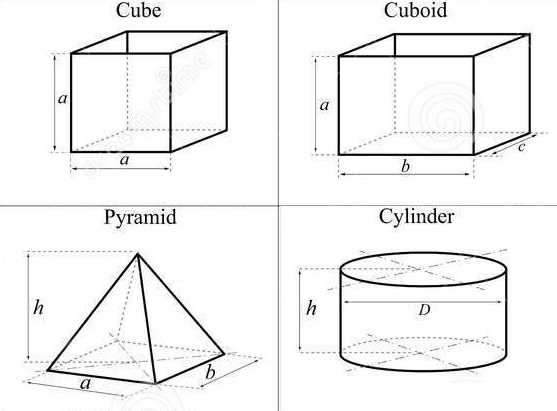

We start by defining the abstract ancestor class:

In [50]:
class Abstract3dShapeWithHeight:
    def __init__(self, h):
        self.h = h
        
    def height(self):
        return self.h
    
    def volume(self):
        return self.height() * self.base_area()
    
    def base_area(self):
        pass

It makes no sense of using this class directly for calculating volume, because method `base_area()` are defined abstract. In spite of this it implements some logic: volume is defined as product of base area and height. Now let's use inheritance to share this logic between descendants.

Concrete classes given below redefine (override) abstract methods of ancestor class, thus we can call them "implementations".

In [51]:
class Cube(Abstract3dShapeWithHeight):
    def __init__(self, h):
        Abstract3dShapeWithHeight.__init__(self, h)
    
    def base_area(self):
        return self.height() ** 2

In [52]:
import math

class Cylinder(Abstract3dShapeWithHeight):
    def __init__(self, h, r):
        Abstract3dShapeWithHeight.__init__(self, h)
        self.r = r

    def base_area(self):
        return math.pi * (self.r ** 2)

In [53]:
mycube = Cube(10)
mycube.volume()

1000

Some explanations for the above code:
 * Instantiation looks like `name_of_the_class(<parameters_passed_to_constructor>)`, pretty much like calling a regular function. Nothing like `new` keyword here.
 * Instantiated object put into `mycube` variable.
 * This variable now contains object of class Cube with all the data passed during initialization.
 * `volume()` method is then called in the context of object `mycube`
 * For instance methods `self` is the required first argument (you can give it a different name, but please don't). So `self` is explicit parameter unlike implicit `this` in some other languages.
 * Methods like `__some_method__` are called **dunder-methods**

Some terminology of OOP:
 * **Class** is a template for an object
 * **Method** is a function defined for a class that acts in the context of an object
 * Object "variables" are called **fields**

Creating an object of given class called **instantiation**. In general, these terms usually are interchangeable:
 * Class = Type (in languages where "everything is an object", like Python or Ruby)
 * Object = Instance
 * Create an object = Instantiate
 * Instance variable = field
 
Now let's make use of our toy classes:

In [54]:
# Let's create another instance of Cube
mycube20 = Cube(20)
mycube20.volume()

8000

Similarly create an instance of Cylinder. It's constructor requires two arguments: radius and height

In [55]:
mycyl = Cylinder(1, 10)
mycyl.volume()

314.1592653589793

We can call other public methods as well:

In [56]:
mycyl.height()

1

What if we wanted to define a class for pyramid? Volume of a pyramid shape not equal to just `base * height`. This is not a problem, because we can override `volume()` (which is concrete, e.g. not abstract), like so:

In [57]:
class Pyramid(Abstract3dShapeWithHeight):
    def __init__(self, h, side):
        Abstract3dShapeWithHeight.__init__(self, h)
        self.side = side
    
    def base_area(self):
        return self.side ** 2
    
    def volume(self):
        return self.base_area() * self.height() / 3.0
    
pyr = Pyramid(10, 2)
pyr.volume()

13.333333333333334

OOP in simple words:
 * **Encapsulation** is another fancy word describing the **black box** paradigm.
 * **Inheritance** can be used to partially define and share logic among implementations.
 * **Polymorphism** allows to change some parts of behaviour defined in ancestor classes without reimplementing the whole algorithm.

## Classic or pure OOP

 * Class defines "behaviour", e.g. methods that manipulate data (internal state) of the object.
 * Intenal state is not exposed. No way to examine internal state of the object, except using public methods that may return some information about it. 
 * Interface is defined by public methods only.


**OOP in Python is a joke**:
 * Internal state is exposed and you have access to object's fields
 * Private methods can be called from outside

## Class definition

```
class <name>:
    [body]
```

or

```
class <name>(Base1[, Base2 ... BaseN]):
    [body]
```

Object instantiation:

In [58]:
class DoesNothing:
    pass

nothing_instance = DoesNothing()

Notice: object instantiation looks like function call (no "new" keyword or smth similar)

In [59]:
type(nothing_instance)

instance

In [60]:
nothing_instance.__class__

<class __main__.DoesNothing at 0x112165808>

In [61]:
nothing_instance.__class__.__name__

'DoesNothing'

Everything is an object in Python, because it has a class. Even classes are objects.

In [62]:
x = 1
x.__class__.__name__

'int'

In [63]:
x.__class__.__class__

type

A note about default object implementation:

In [64]:
d1 = DoesNothing()
d2 = DoesNothing()

d1 == d2

False

By default object's "==" compares id's. For user defined types a programmer must override rich comparison and all necessary dunder methods.

In Python a method with special name ```__init__``` called after object instantiation. First argument (by convention called ```self```) stores the referrence of the created object.

In [65]:
class ClassWithConstructor:
    def __init__(self):
        print "From consturctor", self

my_object = ClassWithConstructor()
print "From outer scope", my_object

From consturctor <__main__.ClassWithConstructor instance at 0x112174d88>
From outer scope <__main__.ClassWithConstructor instance at 0x112174d88>


### Instance variables & methods

Usually ```__init__``` is used to define and initalize instance variables. Instance methods must always have ```self``` as first argument.

In [66]:
class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height 
        
    def square(self):
        return self.width * self.height
    
rect_10x20 = Rectangle(10, 20)
print rect_10x20.square()

rect_30x10 = Rectangle(30, 10)
print rect_30x10.square()

200
300


### Class variables & methods

Notice ```@classmethod``` and ```cls``` instead of ```self```. Also notice that class variable ```density``` is defined and initialized right in class body. ```cls``` in class body references class object so ```density``` can be accessed.

In [67]:
class ChemicalElement():
    @classmethod
    def mass(cls, length, width, height):
        volume = length * width * height # in cm
        return cls.density * volume
    
class Aluminium(ChemicalElement):
    density = 2.70 # g / cm^3
    
class Ferrum(ChemicalElement):
    density = 7.874 # g / cm^3
    
print("Al mass = {} grams".format(Aluminium.mass(10, 10, 10)))
print("Fe mass = {} grams".format(Ferrum.mass(10, 10, 10)))

Al mass = 2700.0 grams
Fe mass = 7874.0 grams


### Static methods

Usually you use them to hide your functions under a namespace (but this is what modules are for).

Notice ```@staticmethod``` and no first required argument.

In [68]:
class SquareCalculator:
    @staticmethod
    def rectangle(width, height):
        return width * height
    
    @staticmethod
    def circle(radius):
        return 2 * 3.14 * radius
    
SquareCalculator.circle(10)

62.800000000000004

#### Example

In [69]:
class BowlingBall:
    DENSITY = 0.1
    
    def __init__(self, radius):
        self.radius = radius
        
    def weight(self):
        return self.sphere_volume(self.radius) * self.DENSITY 
        
    @classmethod
    def sphere_volume(cls, r):
        return (4 / 3) * 3.14 * (r ** 3)
    
my_ball = BowlingBall(10)
my_ball.weight()

314.0

## Classes as structures

Class/instance variables/methods can be dynamically assigned. Sometimes people use classes in place of structures (this is what dictionaries are for).

In [70]:
class MyContainer:
    pass

cont1 = MyContainer()

cont1.x = 62
cont1.y = 'Mama'

cont1.__dict__

{'x': 62, 'y': 'Mama'}

Attributes of the class-level can be checked with method `__dict__()` too.

In [71]:
MyContainer.my_class_attribute = "this is class attribute"

MyContainer.__dict__

{'__doc__': None,
 '__module__': '__main__',
 'my_class_attribute': 'this is class attribute'}

This is possible due to default ```__getattribute__()``` implementation, which first searches in instance and then in class variables.

In [72]:
print(cont1.my_class_attribute)

this is class attribute


In [73]:
cont2 = MyContainer()
print(cont2.my_class_attribute)

this is class attribute


Btw one more way to access instance attribute:

In [74]:
getattr(cont1, 'x')

62

In [75]:
getattr(cont1, 'my_class_attribute')

'this is class attribute'

* [setattr()](https://docs.python.org/3/library/functions.html#setattr)
* [hasattr()](https://docs.python.org/3/library/functions.html#hasattr)

Looks like a prototype-based OOP (Javascript)?

Docs on [staticmethod()](https://docs.python.org/3/library/functions.html#staticmethod) see also [classmethod()](https://docs.python.org/3/library/functions.html#classmethod)

In [76]:
def my_instance_print_hello(self):
    print("Hello " + self.__class__.__name__)
    
def my_static_print_hello():
    print("Hello static")

MyContainer.print_instance = my_instance_print_hello
MyContainer.print_static = staticmethod(my_static_print_hello)

cont2.print_instance()
cont2.print_static()

Hello MyContainer
Hello static


## Inheritance and polymorphism

No surprises: methods can be overriden by superclasses.

In [77]:
class Box2D(object):
    def __init__(self, side):
        self.side = side
        
    def square(self):
        return self.side * self.side
    
class Box3D(Box2D):
    def square(self):
        return self.side * super(Box3D, self).square()
    
box2d = Box2D(10)
print box2d.square()

box3d = Box3D(10)
print box3d.square()

100
1000


### Multiple inheritance and the "deadly diamond of death"

![](https://www.python-course.eu/images/multiple_inheritance_diamond.png)

[Read more](https://www.python-course.eu/python3_multiple_inheritance.php)

Because B goes first in the list of parents.

In [78]:
class A:
    def m(self):
        print("m of A called")

class B(A):
    def m(self):
        print("m of B called")
    
class C(A):
    def m(self):
        print("m of C called")

class D(B, C):
    pass

x = D()
x.m()

m of B called


Because C is the closest parent who overrides m().

In [79]:
class A:
    def m(self):
        print("m of A called")

class B(A):
    pass
    
class C(A):
    def m(self):
        print("m of C called")

class D(B, C):
    pass

x = D()
x.m()

m of A called


Try to avoid multiple inheritance. But it's good for [Mixins](https://en.wikipedia.org/wiki/Mixin):

> In object-oriented programming languages, a Mixin is a class that contains methods for use by other classes without having to be the parent class of those other classes. ... Mixins are sometimes described as being "included" rather than "inherited".

#### Usefull built-in methods

* [isinstance()](https://docs.python.org/2/library/functions.html#isinstance)
* [issubclass()](https://docs.python.org/2/library/functions.html#issubclass)

In [80]:
isinstance(x, D)

True

In [81]:
issubclass(D, C)

True

## Calling parents

* [super()](https://docs.python.org/2/library/functions.html#super)

Here's the demo of what an mixin is. Notice that AdminMixin's and ProgrammerMixin's ```__init__``` are not called. This is why typically mixins have no constructors.

Notice: Person is inherited from `object`. This is Python 2 issue, to read more click [NewClassVsClassicClass](https://wiki.python.org/moin/NewClassVsClassicClass)

In [82]:
class Person(object):
    def __init__(self, name):
        self.name = name        
        print("Person.__init__() called")
        
class AdminMixin:
    def __init__(self):
        self.servers = []
        print("AdminMixin.__init__() called")
        
    def controls(self, servers):
        self.servers = servers[:]

class ProgrammerMixin:
    def __init__(self):
        self.languages = ['Python']
        print("ProgrammerMixin.__init__() called")

    def knows(self, languages):
        self.languages = languages[:]

class Employee(Person, AdminMixin, ProgrammerMixin):
    def __init__(self, name):
        super(Employee, self).__init__(name)
        
vasya = Employee('George')
vasya.name

Person.__init__() called


'George'

Another option is to specify parents explicitly.

In [83]:
class OmniscientEmployee(Person, AdminMixin, ProgrammerMixin):
    def __init__(self, name):
        Person.__init__(self, name)
        AdminMixin.__init__(self)
        ProgrammerMixin.__init__(self)
        
petya = OmniscientEmployee('Peter')

Person.__init__() called
AdminMixin.__init__() called
ProgrammerMixin.__init__() called


But multiple inheritance this way is also bad because you have to follow the correct order of calling methods.

Sometimes in others' code you'll find this way of calling super:

In [84]:
class OlderEmployee(Person):
    def __init__(self, name):
        super(self.__class__, self).__init__(name)
        
masha = OlderEmployee('Maria')

Person.__init__() called


This is Python2 style where super() required an argument. In Python3 super() without any arguments understands the calling context.

At least now we see that there're several ways of calling object methods.

In [85]:
class MyPrinter:
    def echo(self, message):
        print message
        
    def woofwoof(self):
        self.echo('Woof-woof!')
        
    def moomoo(self):
        MyPrinter.echo(self, 'Moo-moo!')
        
my_printer = MyPrinter()

my_printer.woofwoof()
my_printer.moomoo()

# MyPrinter.print is "bound" method (it requires an object in "self" argument)
MyPrinter.echo(my_printer, 'Meow-meow!')

Woof-woof!
Moo-moo!
Meow-meow!


### A note about abstract classes

How it's usually done:

In [86]:
class MyAbstractClass:
    def do_the_thing(self):
        raise NotImplementedError() # or just pass
        
class MyRealDoer(MyAbstractClass):
    def do_the_thing(self):
        print("Thing is done")
        
my_abstract = MyAbstractClass()
my_real = MyRealDoer()

In [87]:
my_real.do_the_thing()

Thing is done


In [88]:
my_abstract.do_the_thing()

NotImplementedError: 

Also see [abc module](https://docs.python.org/3/library/abc.html)

## Public and private access modifiers

A good [explainer post](http://radek.io/2011/07/21/private-protected-and-public-in-python/)

Python doesn’t have any mechanisms, that would effectively restrict you from accessing a variable or calling a member method. All of this is a matter of culture and **convention**.

* All member variables and methods are public by default in Python.
* The ```_``` prefix means **stay away even if you're not technically prevented from doing so**. This also marks a **protected** member
* The ```__``` prefix means **private**, e.g. nobody should be able to access it from outside the class.

Pros: since all members are publicly accessible, no need for boilerplate getter/setter code (but still possible using @property).

Python supports a technique called name mangling (obfuscation). This feature turns every member name prefixed with at least two underscores and suffixed with at most one underscore into ```_<className><memberName>```

In [89]:
class PublicProtectedPrivateDemo:
    def __init__(self):
        self.public     = 'public'
        self._protected = 'protected'
        self.__private  = 'private'
        
pppd = PublicProtectedPrivateDemo()
pppd.__dict__

{'_PublicProtectedPrivateDemo__private': 'private',
 '_protected': 'protected',
 'public': 'public'}

You can still access ```__private``` member by refererring ```_PublicProtectedPrivateDemo__private```.

In [90]:
pppd._PublicProtectedPrivateDemo__private

'private'

## How to make a property

See [property()](https://docs.python.org/2/library/functions.html#property)

To fully understand this example, we have to learn about decorators. But don't worry, we'll do it in the next workshop.

In [91]:
class Student:
    def __init__(self, name, surname):
        self.name = name
        self.surname = surname

    @property
    def fullname(self):
        return self.name + ' ' + self.surname
    
    @fullname.setter
    def fullname(self, value):
        self.name, self.surname = value.split()
        
student = Student('John', 'Smith')
student.fullname

'John Smith'

In [92]:
student.fullname = 'Ivan Sidorov'
student.name, student.surname

('John', 'Smith')

Properties are useful for:
* Calculated variables (like in example above)
* Read-only or write-only variables
* Getter/setter replacement

## Special method names

See [Data model](https://docs.python.org/3/reference/datamodel.html#special-method-names)

> A class can implement certain operations that are invoked by special syntax (such as arithmetic operations or subscripting and slicing) by defining methods with special names. This is Python’s approach to operator overloading, allowing classes to define their own behavior with respect to language operators.

Let's learn by example. Imagine we want a class that is a human language representation of number from 0 to 9 and acts like an integer.

In [93]:
class Humanumba:
    words = 'zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'
    
    def __new__(cls, word):
        if word not in cls.words:
            raise Exception('Not in vocabulary')
            
        obj = super().__new__(cls)
        
        return obj
    
    def __init__(self, word):
        self.index = self.words.index(word)
    
    def __str__(self):
        return self.words[self.index]
    
    def __repr__(self):
        return "{cls}('{word}')".format(
            cls=self.__class__.__name__,
            word=self.words[self.index]
        )
    
one = Humanumba('one')

print(one)
repr(one)

one


"Humanumba('one')"

Let's now try some basic operations.

In [94]:
another_one = Humanumba('one')

one == another_one

False

But ```one``` and ```another_one``` represent the same entity. Let's fix that.

In [95]:
class Humanumba2(Humanumba):
    def __eq__(self, other):
        return self.index == other.index
    
one = Humanumba2('one')
another_one = Humanumba2('one')

one == another_one

True

In [96]:
zero = Humanumba2('zero')

zero < one

False

Let's fix that too:

In [97]:
class Humanumba3(Humanumba2):
    def __lt__(self, other):
        return self.index < other.index
    
    def __le__(self, other):
        return self.index <= other.index    
    
    def __gt__(self, other):
        return self.index > other.index
    
    def __ge__(self, other):
        return self.index >= other.index

zero = Humanumba3('zero')
one = Humanumba3('one')
two = Humanumba3('two')

zero < one < two

True

Humanumba is actually a number in it's core, let's allow to compare to numeric types:

In [98]:
class Humanumba4(Humanumba3):
    def __lt__(self, other):
        index = other if isinstance(other, (int, float)) else other.index    
        return self.index < index
    
    def __le__(self, other):
        index = other if isinstance(other, (int, float)) else other.index
        return self.index <= index    
    
    def __gt__(self, other):
        index = other if isinstance(other, (int, float)) else other.index
        return self.index > index
    
    def __ge__(self, other):
        index = other if isinstance(other, (int, float)) else other.index        
        return self.index >= index
    
one = Humanumba4('one')
0 < one < 3.14

True